# Practical Lab 7 - Clustering

Note: This practical session is based on chapter 12, section 12.5.3.

In [2]:
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as shc
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf

## Part 1 - Hierarchical

Load the housing.csv. We gonna use this dataset today.

In [3]:
#more info:
#https://www.kaggle.com/datasets/camnugent/california-housing-prices/

home_data = pd.read_csv('housing.csv')
home_data_copy = pd.read_csv('housing.csv')
home_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# Clusterização

Queremos criar (agrupar) classes representativas dos dados. (Ex. Class 1 , Classe 2 e Class 3 ... )

#### Metodo Hierarquico
    Exemplo: pontos A, B, C, D, E [Dispersos num grafico]
    - arvore de junção dos pontos;
        Todo
        A, B -> Grupo 1
           C -> Grupo 2 
        D, E -> Grupo 3
    
    
    


1 - Create a scatterplot for X = longitude and Y = latitude.

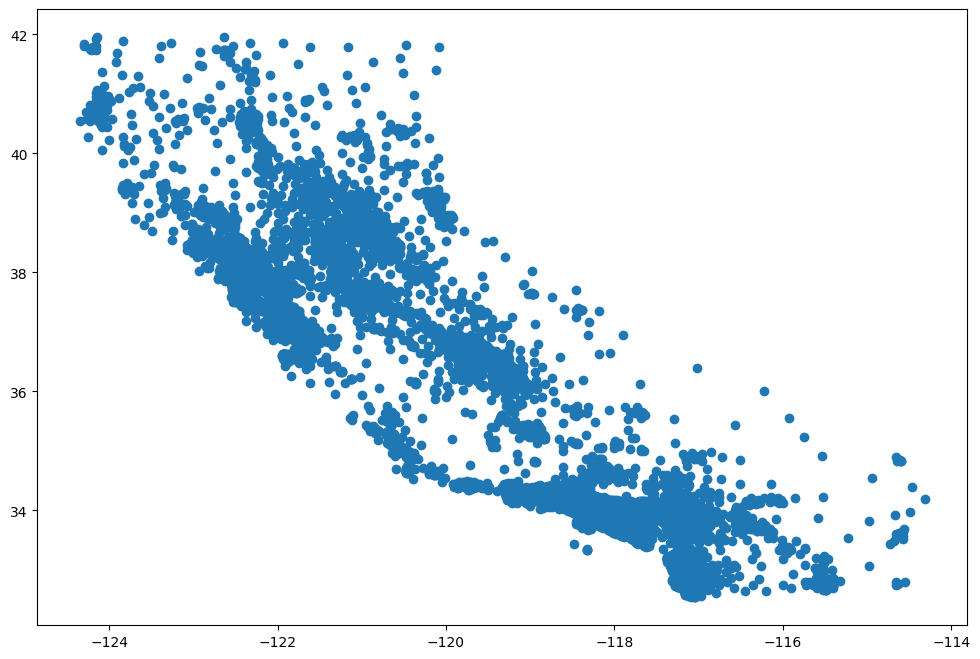

In [4]:
plt.figure(figsize=(12,8))
plt.scatter(home_data['longitude'], home_data['latitude'])
plt.show()

#### Cada ponto é uma casa

Vamos tentar encontrar grupos 

2 - What type of data do we have? Where are the houses located? Try observing the data projected on the map of California.

<img src="https://upload.wikimedia.org/wikipedia/commons/2/22/California_economic_regions_map_%28labeled_and_colored%29.svg" alt="drawing" width="400"/>

3 - Would we be able to locate demographically dense regions using logistic regression and just latitude and longitude data?

# Não vamos conseguir usar a Regressão logistica, pois esta nao tem em consideração a distancia entre pontos 

4 - If we want to locate the most populated regions using residential data, one of the solutions would be to use hierarchical clusters. The first step is create a distance matrix. Create the distance matrix using `scipy.cluster.hierarchy`.

# https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html

### Single - compara pontos mais proximos entre clusters
    - Só distancia entre 2 pontos mais proximos
### Complete - mais distantes
    - Só distancia entre 2 pontos mais distantes
### Media (average) 
    todos os pontos e todas as distancias
### Centroid 
    - vai definir um centro para a cluster (media entre todos os pontos)

In [5]:
# Z = shc.linkage(home_data[['longitude' , 'latitude']], 'ward')

Z = shc.linkage(home_data[['longitude' , 'latitude']],
                method='single',
                metric='euclidean'
               )

print(Z[0])

[1630. 1631.    0.    2.]


In [6]:
print(Z.shape)

(20639, 4)


In [8]:
labels = shc.fcluster(
    Z,3,
    criterion='maxclust'
    )

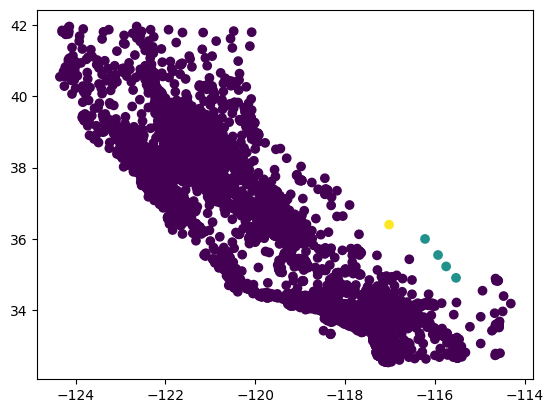

In [9]:
plt.scatter(home_data['longitude'], home_data['latitude'],c=labels)

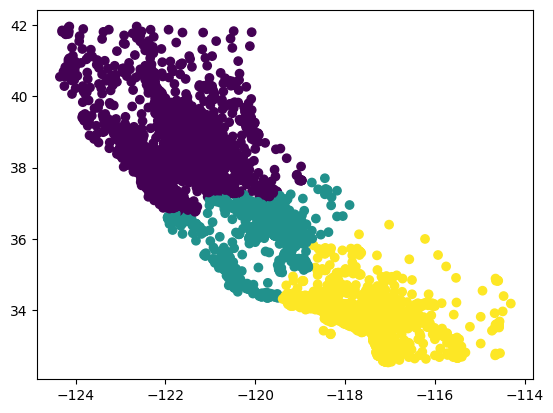

In [10]:
Z = shc.linkage(home_data[['longitude' , 'latitude']],
                method='complete',
                metric='euclidean'
               )

labels = shc.fcluster(
    Z,3,
    criterion='maxclust'
    )

plt.scatter(home_data['longitude'], home_data['latitude'],c=labels)

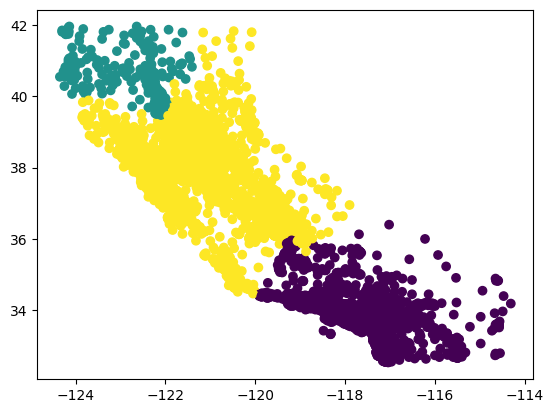

In [11]:
Z = shc.linkage(home_data[['longitude' , 'latitude']],
                method='average',
                metric='euclidean'
               )

labels = shc.fcluster(
    Z,3,
    criterion='maxclust'
    )

plt.scatter(home_data['longitude'], home_data['latitude'],c=labels)

5 - Which method and metric did you use?

6 - Let's try different methods and their graphical representations. Create linkage matrices for hierarchical clustering and plot them. Make three settings for the methods: single, complete and average. For your plots, set the number of clusters equal to three.

# Ver acima

7 - Analyze the plots above to observe how the points were distributed. Don't take the colors as a reference, they only help you differentiate the clusters in the same graph.

8 - For the plots above we configured our model for 3 clusters. But how do we know the ideal number of clusters to fit the data?

9 - One of the solutions for this is the use of the Dendrogram. Plot the dendrogram for a linkage matrix with `metric='euclidean'` and `method='average'`.

10 - Analyzing the dendrogram above, how many clusters do you think we have?

11 - We can modify the dendrogram to visually displays more color groups(clusters) by manipulating `color_threshold`. Adjust the `color_threshold` to 1.5 and regenerate the dendrogram again.

12 - Create labels for the cluster configuration proposed above and plot them on the graph.

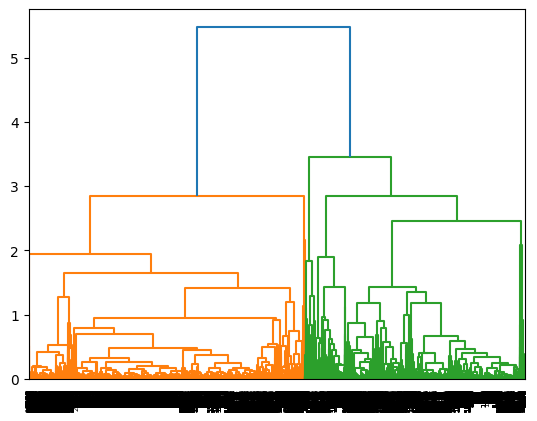

In [12]:
# rc = shc.linkage(home_data[['latitude','longitude']], 'ward','euclidean')
# fig = plt.figure(figsize=(25, 10))
dn = shc.dendrogram(Z)
plt.show()

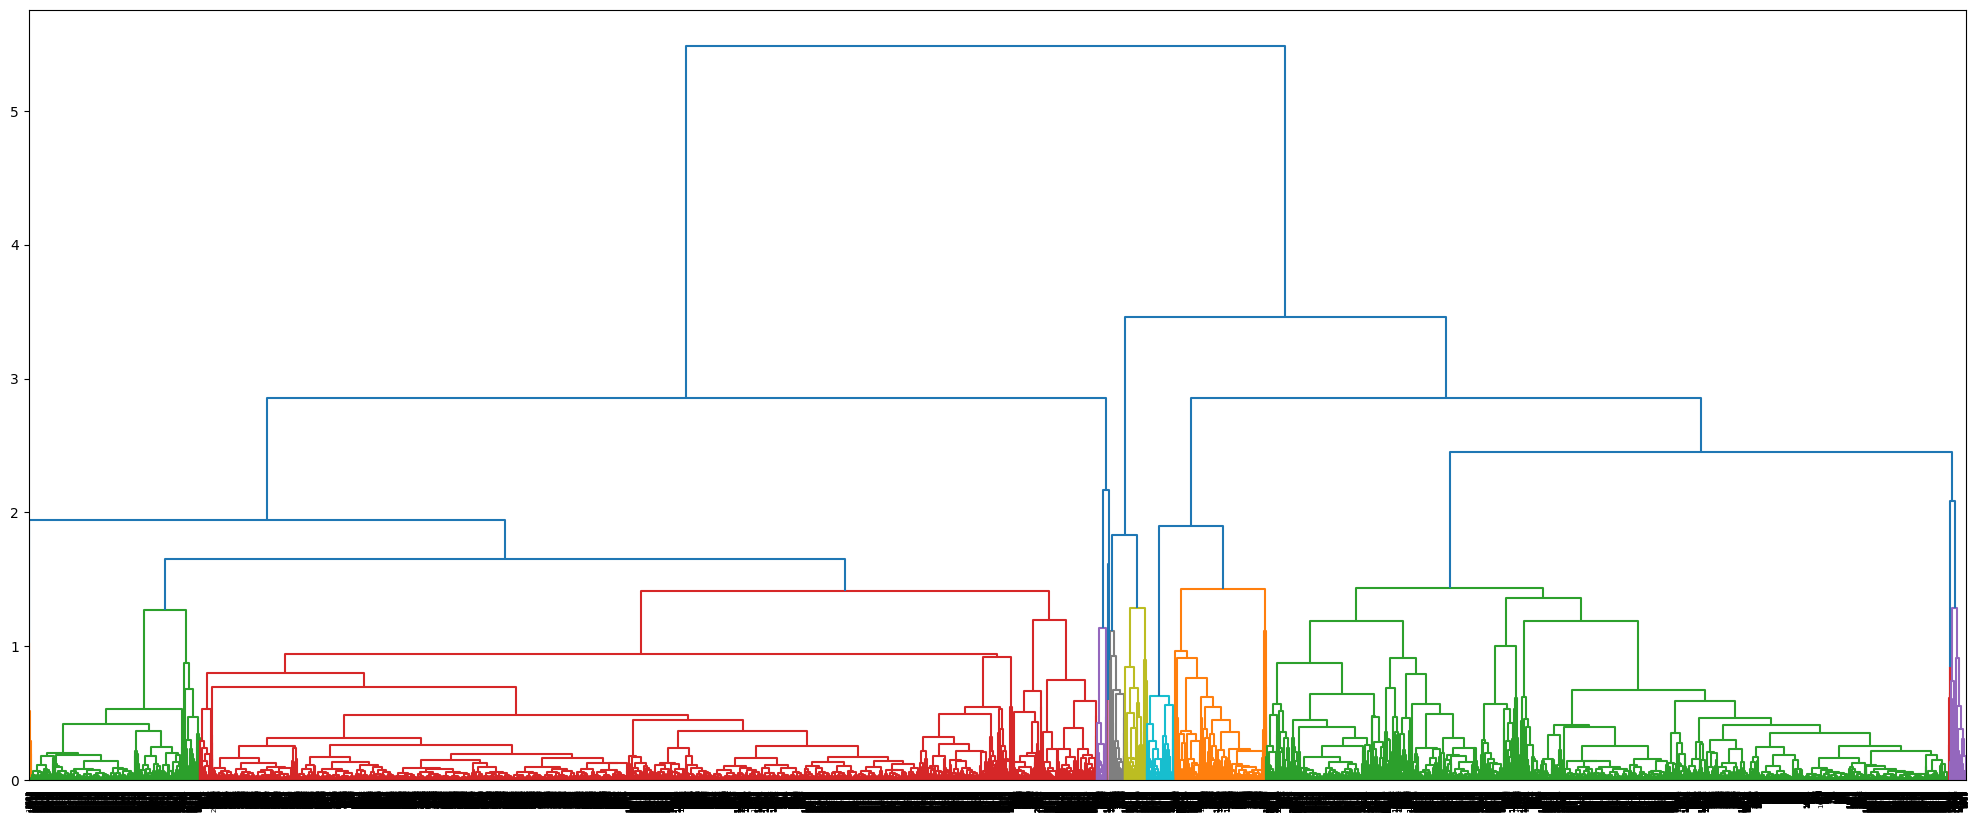

In [13]:

fig = plt.figure(figsize=(25, 10))
dn = shc.dendrogram(Z,color_threshold=1.5)
plt.show()


# Notas

matriz z , linkage



KMEANS

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[ 1  1  1 ... 15 15 15]


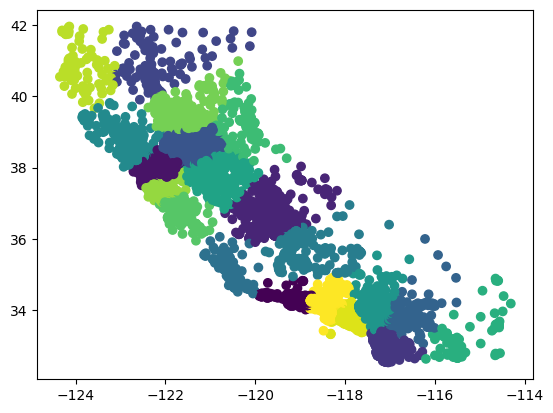

In [20]:
kmeans = KMeans(n_clusters=20).fit_predict(home_data[['latitude','longitude']])
# kmeans.labels_

plt.scatter(home_data['longitude'], home_data['latitude'],c=kmeans)



# print(kmeans)



In [ ]:
print(label)